This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Id - customer id

Age - Customer's age in completed years

Experience - Number of years of professional experience

Income - Annual income of the customer ($000)

ZIP code - Home Address ZIP code.

Family - family size of customer

CCAvg - Avg. spending on credit cards per month ($000)

Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage - Value of house mortgage if any. ($000)

Personal Loan - Did this customer accept the personal loan offered in the last campaign?

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("E:\\New folder\\Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
#EDA

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [11]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [12]:
#data is highly imbalanced. imbalanced ratio is 90:10. out of 5000 only 480 opted for personal loan

In [13]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [14]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [15]:
df.drop(["ID","ZIP Code"],axis=1,inplace=True)

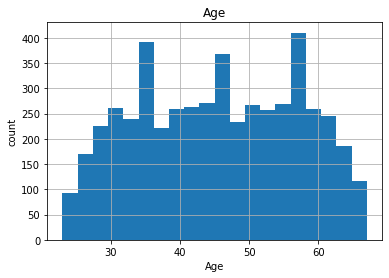

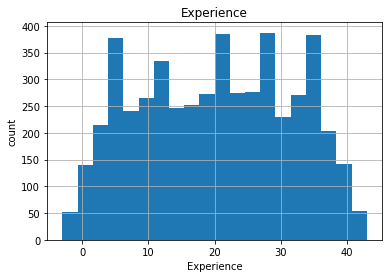

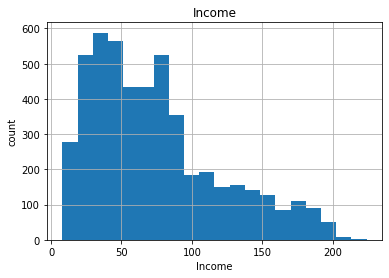

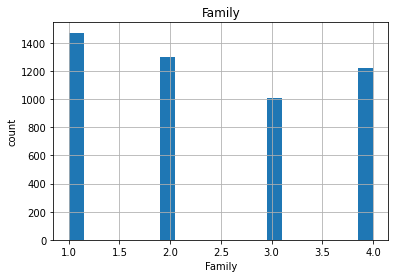

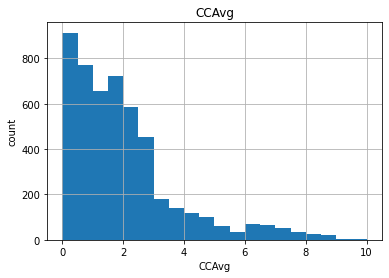

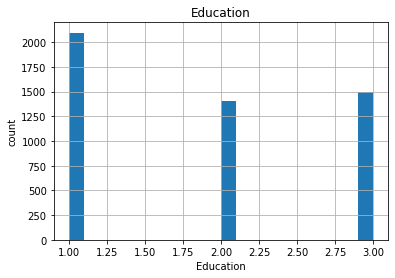

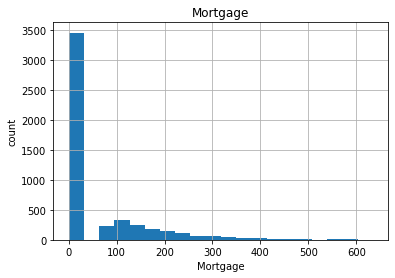

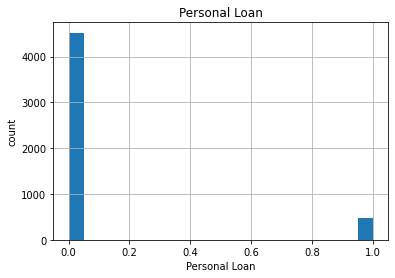

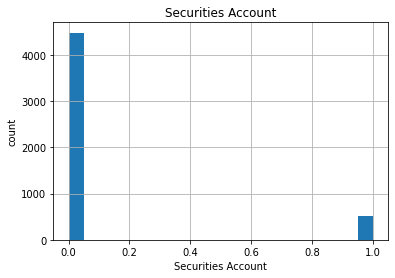

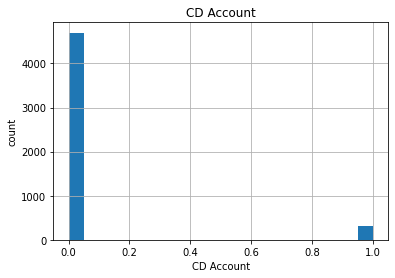

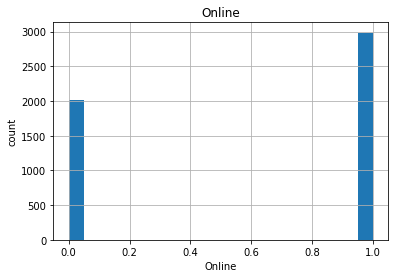

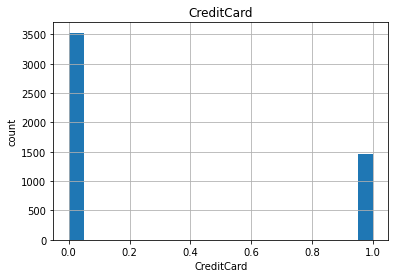

In [16]:
for feature in df:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [17]:
#filterin numerical & categorical columns
categ_col = []
for col in df.columns:
    data=df.copy()
    if data[col].nunique()<=5:
        if col!='Personal Loan':
            categ_col.append(col)
            
print('category numerical columns are {}'.format(categ_col))   
#categ_col.pop()
#categ_col

category numerical columns are ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [18]:
num_col = [col for col in df.columns if col not in categ_col]
print('numerical columns are {}'.format(num_col))
num_col.pop()
num_col

numerical columns are ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [19]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [20]:
#creating fontdicts for formatting figure text
axtitle_dict = {'family':'serif','color':'darkred','weight':'bold'}
axlab_dict = {'family':'serif','color':'black','size':14}

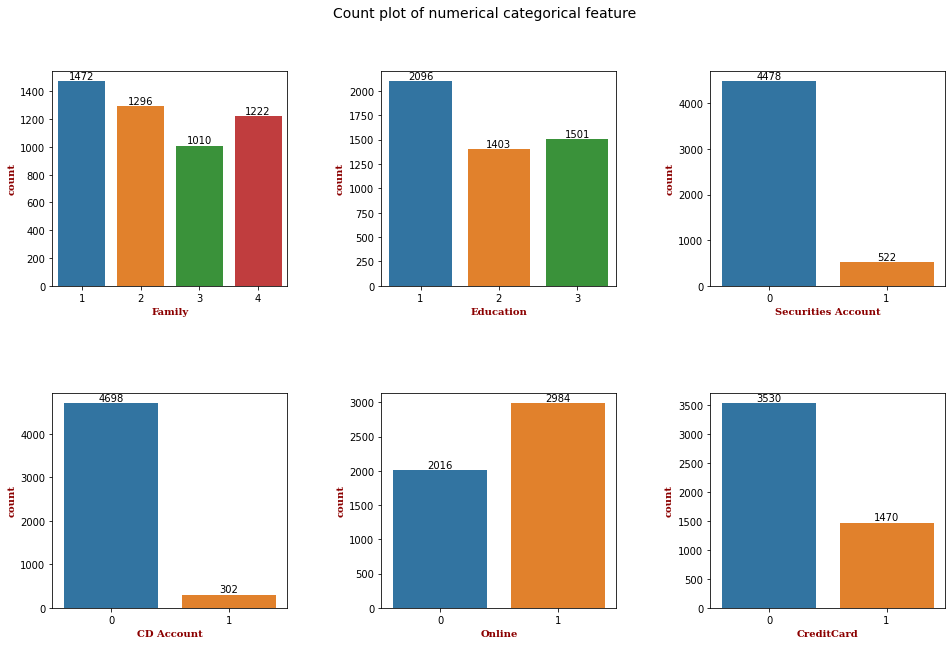

In [21]:
#Univariant Analysis
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count plot of numerical categorical feature',fontsize=14)
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i, columns in enumerate(categ_col):
    input = np.unique(df[columns],return_counts = True)
    col = 'input'
    ax1 = fig.add_subplot(3,3,i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y =list(eval(f'{col}[1]')))
    ax1.set_xlabel(f'{columns}', fontdict=axtitle_dict)
    ax1.set_ylabel('count', fontdict=axtitle_dict)
    ax1.bar_label(ax1.containers[0])

In [22]:
#Outlier detection

In [23]:
data_num= data[num_col]
data_num.describe()

Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((data_num < (Q1 - (1.5*IQR))) | (data_num > (Q3 + (1.5*IQR)))).any()


Age           False
Experience    False
Income         True
CCAvg          True
Mortgage       True
dtype: bool

In [24]:
#Income, CCAvg, Mortgage have outliers

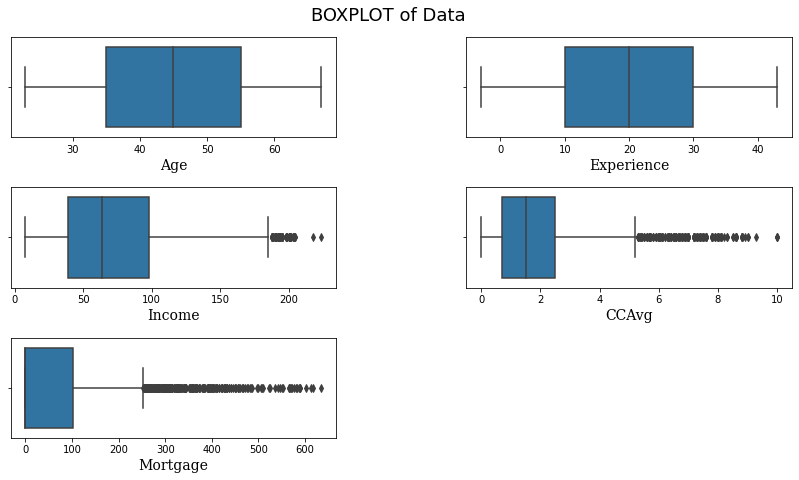

In [25]:
#Visulization of outliers using box plot
fig = plt.figure(figsize=(14,7))
fig.suptitle('BOXPLOT of Data',fontsize=18, fontweight=12)
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i,col in enumerate(num_col):
    ax1 = fig.add_subplot(3, 2, i+1)
    ax1 = sns.boxplot(data=df, x=col);
    #ax1.set_title(f'{col}',fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}',fontdict=axlab_dict)

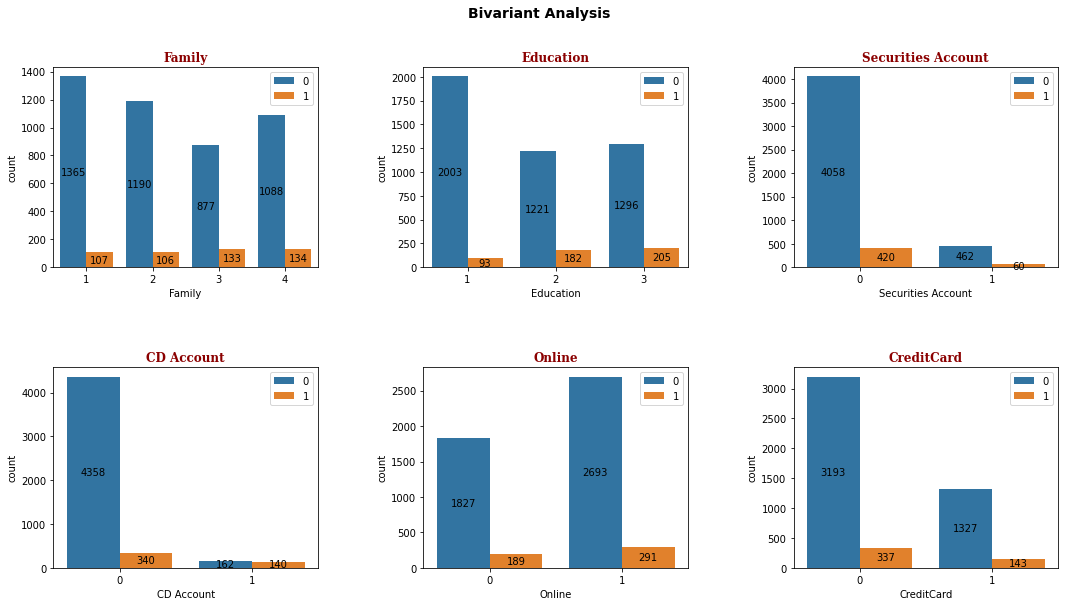

In [26]:
#Bivariant analysis
fig = plt.figure(figsize=(18,14))
fig.suptitle('Bivariant Analysis', fontsize=14,fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5,wspace=0.4)
for i,col in enumerate(categ_col):
    a = fig.add_subplot(3,3,i+1)
    a = sns.countplot(x=df[col],ax=a,hue=df['Personal Loan'])
    a.set_title(col, fontdict=axtitle_dict)
    a.bar_label(a.containers[0], label_type='center')
    a.bar_label(a.containers[1], label_type='center')
    a.legend()

# Observation

1. Highly Educated customer more intrested in Personal Loan than lower educated customer.
2. Customers who don't have Securities Account more intrested than customer having securities account in Personal Loan.
3. Customers with CD account have higher probability to take personal loan.
4. Cutomers with online internet banking are more intrested than non online customers in personal loan.
5. Cutomers without credit card have much higher chance to take personal loan

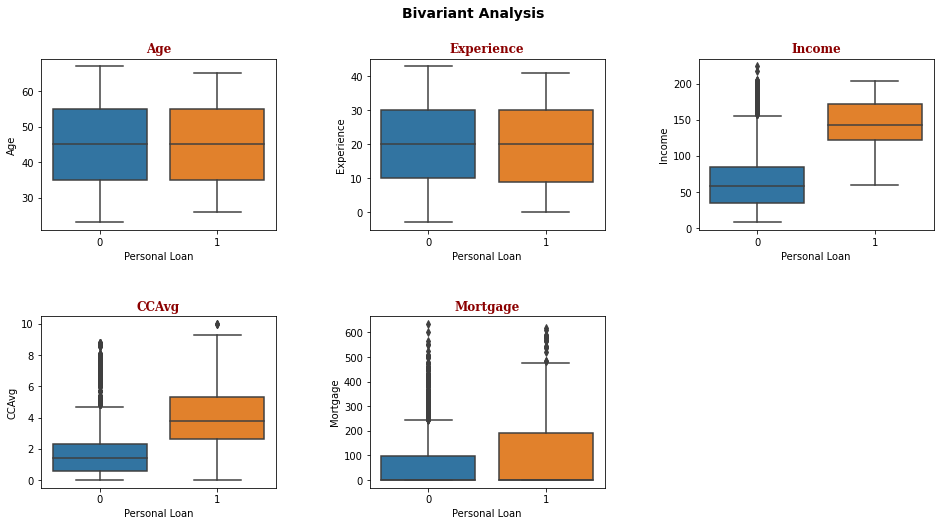

In [27]:
fig = plt.figure(figsize=(16,12))
fig.suptitle('Bivariant Analysis', fontsize=14,fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5,wspace=0.4)
for i,col in enumerate(num_col):
    a = fig.add_subplot(3,3,i+1)
    a = sns.boxplot(x = 'Personal Loan',y=col,ax=a,data=df)
    a.set_title(col, fontdict=axtitle_dict)

1. Age and Experience doesn't have much effect on personal loan
2. Cutomers with personal loan have much  higher income.
3. Cutomers who opted for personal loan have higher credit card avg spending.
4. Cutomers who opted for personal loan have slightly higher mortgage.

In [28]:
#outlier detection

In [29]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

In [30]:
dict = {}
for col in ['Income','CCAvg','Mortgage']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    dict['upper_limit'+'_'+col] = upper_limit
    dict['lower_limit'+'_'+col] = lower_limit

In [31]:
#for col in ['Income','CCAvg','Mortgage']:
#print(df['Income']<lower_limit
#print(df['Income']>upper_limit

In [32]:
dict

{'upper_limit_Income': 186.5,
 'lower_limit_Income': -49.5,
 'upper_limit_CCAvg': 5.2,
 'lower_limit_CCAvg': -2.0,
 'upper_limit_Mortgage': 252.5,
 'lower_limit_Mortgage': -151.5}

In [33]:
#for col in ['Income','CCAvg','Mortgage']:
#    print('There are total {} Cutomers data which {} are less than lower_limit'.format(df[col]<lower_limit,df[col]))
#    print('There are total {} Cutomers data which {} are more than upper_limit '.format(df[col]>upper_limit,df[col]))

In [34]:
for col in ['Income','CCAvg','Mortgage']:
    df[col]=np.where(
       df[col] >dict['upper_limit_'+col],
       dict['upper_limit_'+col],
       np.where(
           df[col]<dict['lower_limit_'+col],
           dict['lower_limit_'+col],
           df[col])
    )

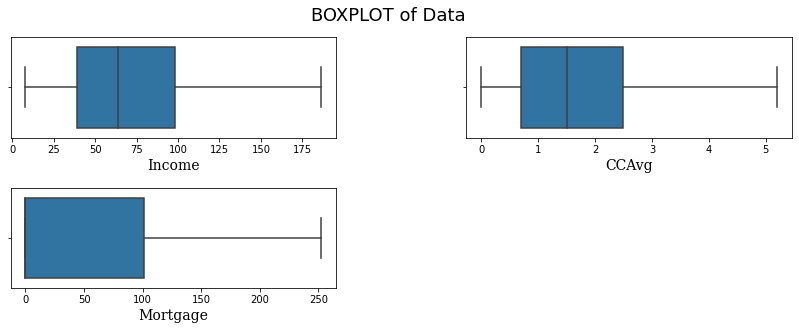

In [35]:
#After outlier treatment
fig = plt.figure(figsize=(14,7))
fig.suptitle('BOXPLOT of Data',fontsize=18, fontweight=12)
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i,col in enumerate(['Income','CCAvg','Mortgage']):
    ax1 = fig.add_subplot(3, 2, i+1)
    ax1 = sns.boxplot(data=df, x=col);
    #ax1.set_title(f'{col}',fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}',fontdict=axlab_dict)

Creating dummies for categorical columns

In [36]:
dum_data = pd.get_dummies(df, columns=categ_col)
dum_data

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49.0,1.6,0.0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34.0,1.5,0.0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11.0,1.0,0.0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100.0,2.7,0.0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45.0,1.0,0.0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1.9,0.0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,30,4,15.0,0.4,85.0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,63,39,24.0,0.3,0.0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,65,40,49.0,0.5,0.0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [37]:
#Correlation Analysis

In [38]:
pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


In [39]:
import plotly.express as px

In [40]:
#ax = round(dum_data.corr()['Personal Loan'].sort_values(ascending = False),2)
#ax.bar_label(ax.containers[0])
#plt.show()

In [41]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


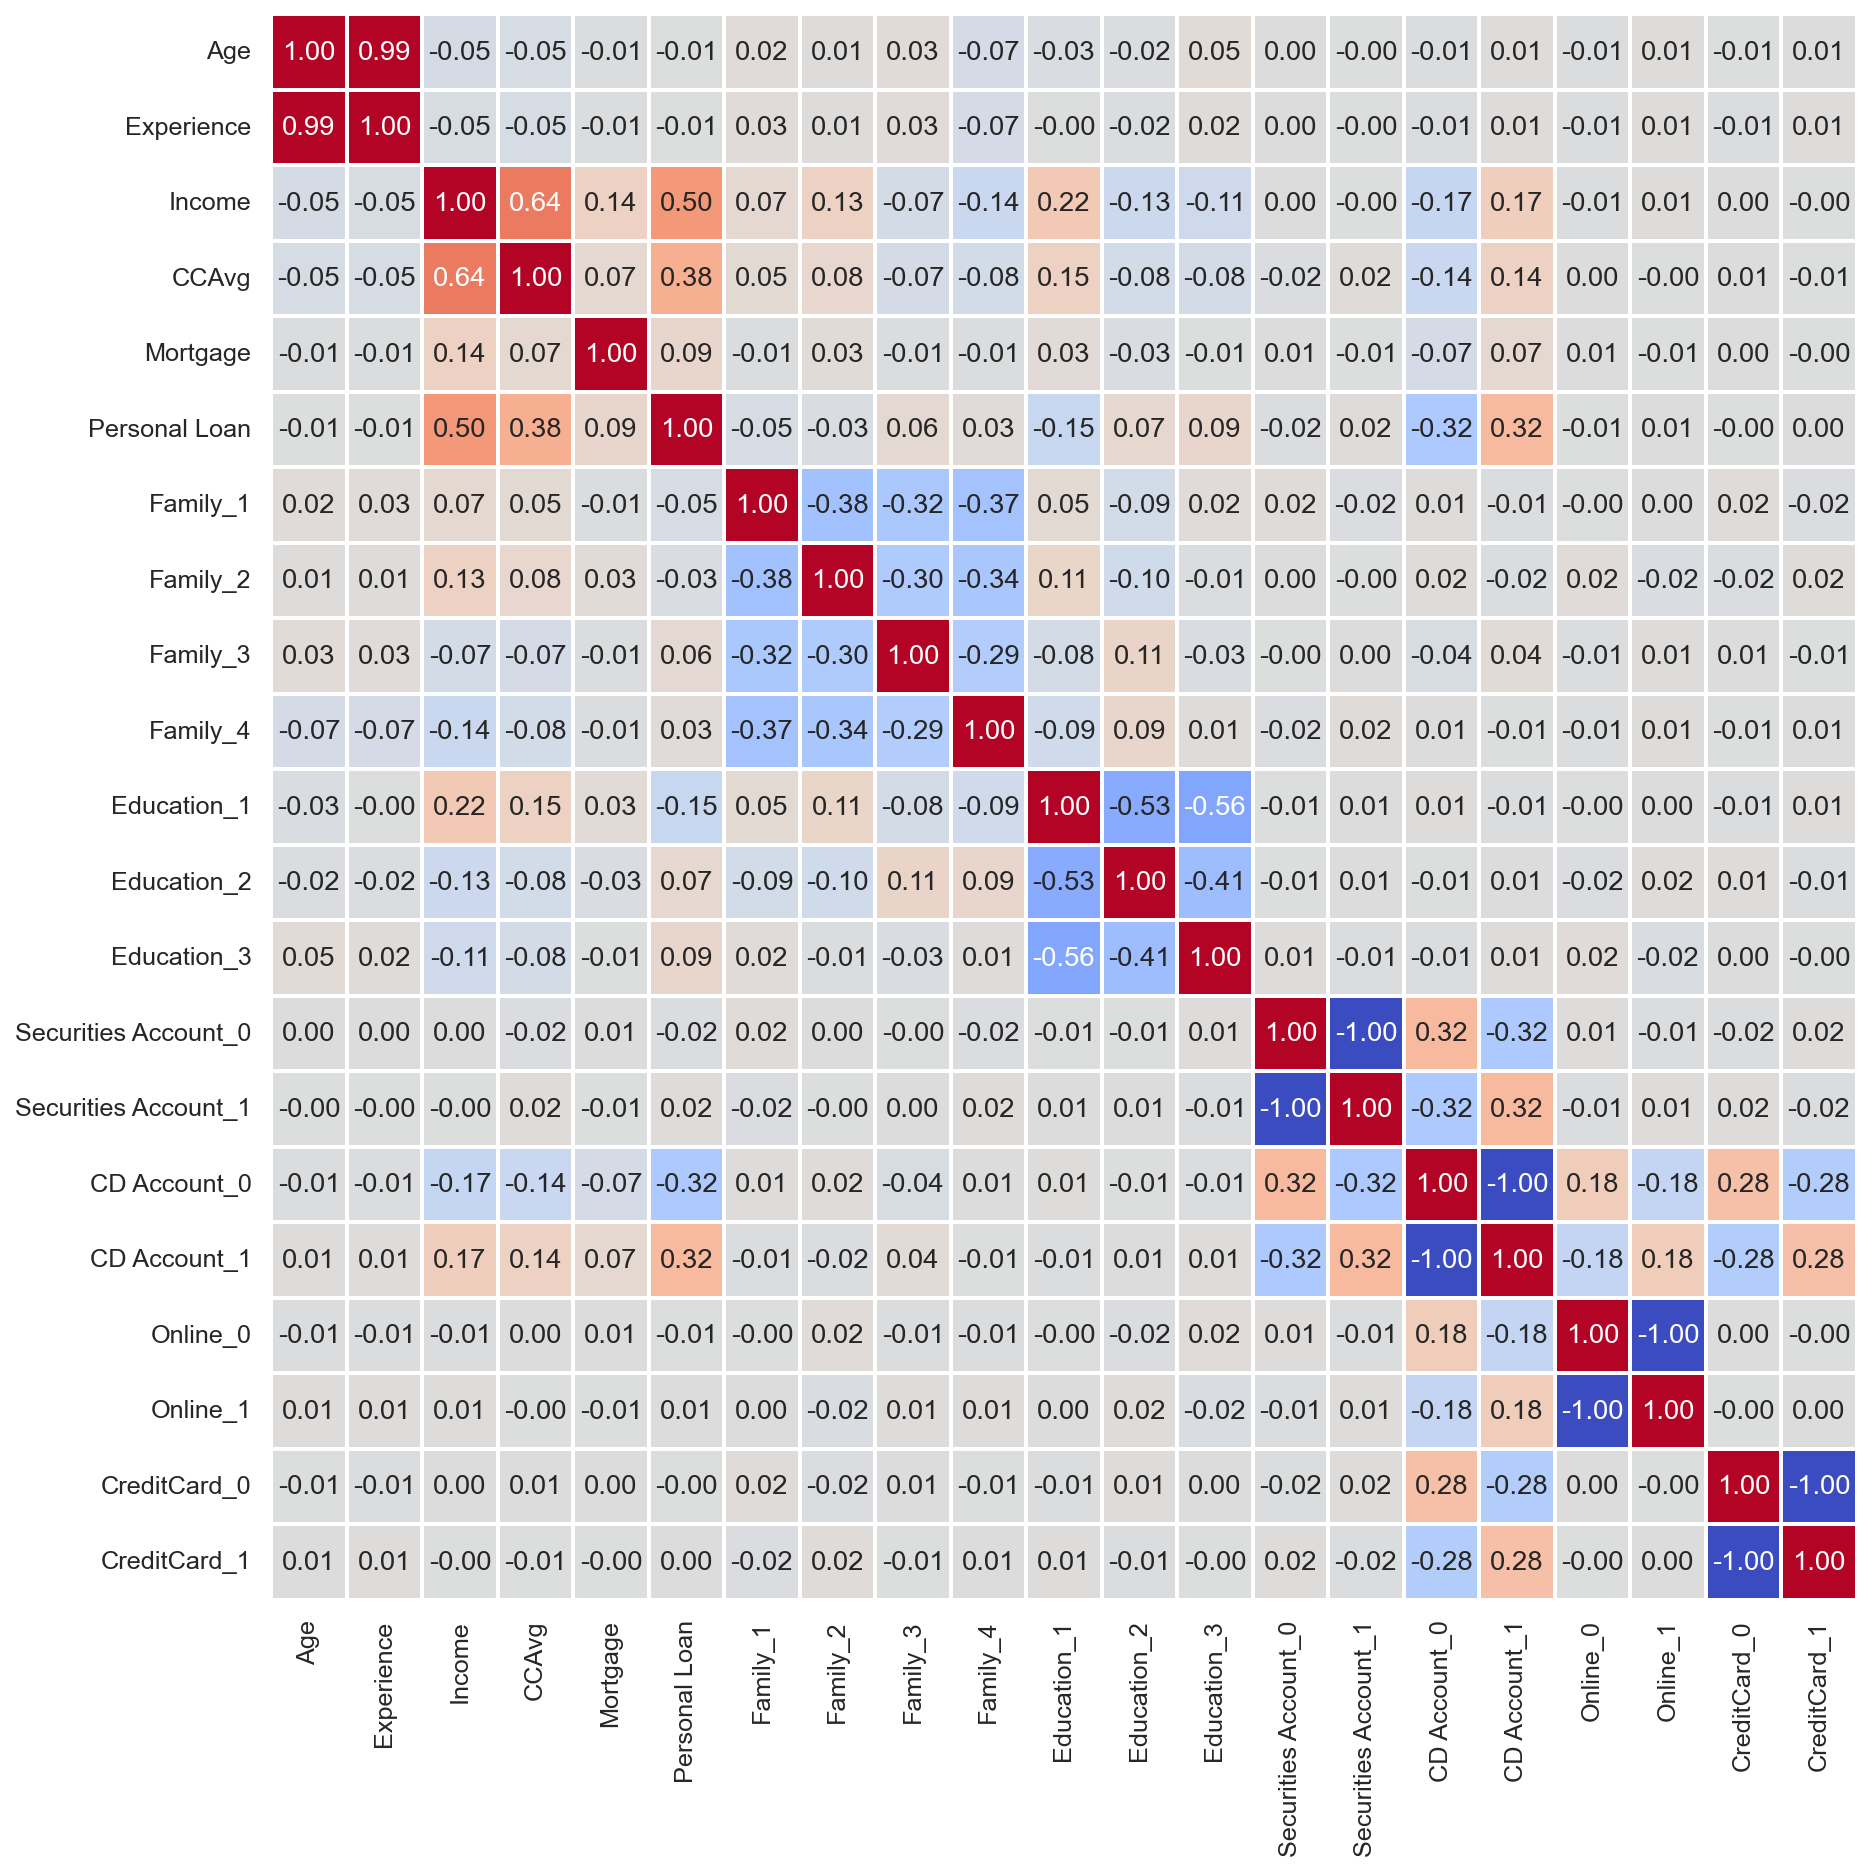

In [42]:
corr_matrix = dum_data.corr()
#return a copy of array with upper part of the triangle
mask = np.triu(corr_matrix)

sns.set(font_scale=1.1)
plt.figure(figsize=(14,14), dpi=150)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
             square=True,linewidths=1, cbar=False)
plt.show()

# Modelling

In [43]:
X = dum_data.drop('Personal Loan',axis=1)
y = dum_data['Personal Loan']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3500, 20), (3500,), (1500, 20), (1500,))

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, f1_score
from sklearn.metrics import plot_confusion_matrix

In [47]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(random_state=0)
model_1.fit(X_train,y_train)
y_train_pred=model_1.predict(X_train)
print("Train score is :",model_1.score(X_train,y_train_pred))
y_pred = model_1.predict(X_test)
print("Test score is :",model_1.score(X_test,y_test))
print(metrics.classification_report(y_test,y_pred))

Train score is : 1.0
Test score is : 0.9673333333333334
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.92      0.76      0.83       157

    accuracy                           0.97      1500
   macro avg       0.94      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



C:\Users\Aspire 5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TP = Number of true positives,
FP = Number of false positives,
TN = Number of true negatives,
FN = Number of false negatives,

      Precision = TP / (TP+FP)
      
      Recall = TP / (TP+FN)
      
      f1     = 2 * (precision * recall) / (precision + recall)

In [51]:
#from sklearn.metrics import plot_confusion_matrix
#def confusion_matrix_plot(X_test,y_test,classifier,classifier_name):
#    ax = plot_confusion_matrix(X_test,y_test,classifier)

Accuracy score is : 1.0
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.92      0.76      0.83       157

    accuracy                           0.97      1500
   macro avg       0.94      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



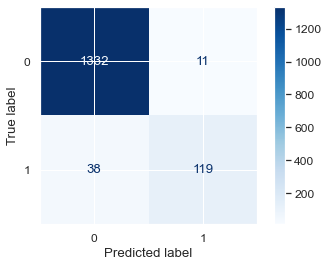

In [62]:
log_model=LogisticRegression(random_state=0)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(log_model.score(X_test,y_pred))
print("As :",accuracy_score(y))
print(metrics.classification_report(y_test,y_pred))
plot_confusion_matrix(log_model,X_test,y_test,cmap="Blues")

Accuracy score is : 1.0
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.54      0.26      0.35       157

    accuracy                           0.90      1500
   macro avg       0.73      0.62      0.65      1500
weighted avg       0.88      0.90      0.88      1500



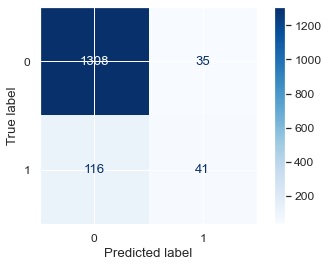

In [52]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print(knn_model.score(X_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
plot_confusion_matrix(knn_model,X_test,y_test,cmap="Blues")

Accuracy score is : 1.0
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.90      0.91       157

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



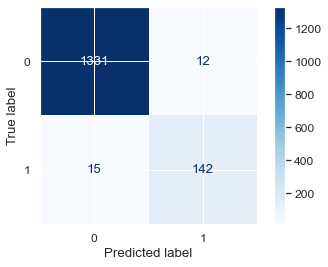

In [59]:
dec_model=DecisionTreeClassifier(random_state=0)
dec_model.fit(X_train,y_train)
y_pred=dec_model.predict(X_test)
print(dec_model.score(X_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
plot_confusion_matrix(dec_model,X_test,y_test,cmap="Blues")

Accuracy score is : 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1343
           1       0.99      0.92      0.96       157

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.98      1500
weighted avg       0.99      0.99      0.99      1500



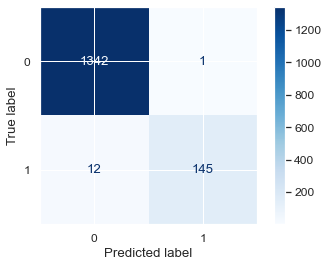

In [60]:
ram_model=RandomForestClassifier(random_state=0)
ram_model.fit(X_train,y_train)
y_pred=ram_model.predict(X_test)
print(ram_model.score(X_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
plot_confusion_matrix(ram_model,X_test,y_test,cmap='Blues')

Accuracy score is : 1.0
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1343
           1       0.59      0.13      0.21       157

    accuracy                           0.90      1500
   macro avg       0.75      0.56      0.58      1500
weighted avg       0.87      0.90      0.87      1500



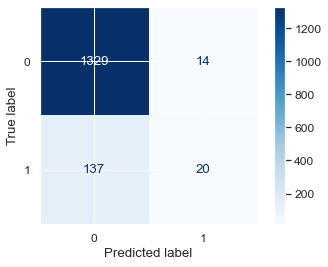

In [55]:
svc_model=SVC(kernel='rbf',probability=True)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
print(svc_model.score(X_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
plot_confusion_matrix(svc_model,X_test,y_test,cmap='Blues')

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, f1_score
from sklearn.metrics import plot_confusion_matrix

In [57]:
def Model_features(X,y):
    mod_class = [LogisticRegression(), KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier(),SVC()]
    Model,train_accuracy,test_accuracy,precision,recall,f1,cross_val_sc=[],[],[],[],[],[],[]
    for i in mod_class:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
        model = i.fit(X_train,y_train)
        train_pred=model.predict(X_train)
        test_pred=model.predict(X_test)
        train_acc= accuracy_score(y_train,train_pred)
        test_acc= accuracy_score(y_test,test_pred)
        pre_scr= precision_score(y_test,test_pred)
        recall_scr= recall_score(y_test,test_pred)
        f1_scr= f1_score(y_test,test_pred)
        cv_score= cross_val_score(i,X,y,cv=5,).mean()
        
        Model.append(i)
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
        cross_val_sc.append(cv_score)
        precision.append(pre_scr)
        recall.append(recall_scr)
        f1.append(f1_scr)
        #print(f'Accuracy score is : {test_accuracy}')
        #print(metrics.classification_report(y_test,test_pred))
        
    data={"Model":Model,"Train_accuracy":train_accuracy,"Test_accuracy":test_accuracy,"Cross_vals":cross_val_sc,
         "Precision_score":precision,"Recall_score":recall,"f1_score":f1}
    data=pd.DataFrame(data)
    return(data)

In [58]:
import warnings
warnings.simplefilter("ignore")
Model_features(X,y)

,Model,Train_accuracy,Test_accuracy,Cross_vals,Precision_score,Recall_score,f1_score
0,LogisticRegression(),0.962000,0.964000,0.9616,0.902174,0.648438,0.754545
1,KNeighborsClassifier(),0.933143,0.914000,0.9082,0.494253,0.335938,0.400000
2,DecisionTreeClassifier(),1.000000,0.984000,0.9810,0.926230,0.882812,0.904000
3,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.984000,0.9864,0.956140,0.851562,0.900826
4,SVC(),0.905429,0.919333,0.9096,0.589744,0.179688,0.275449


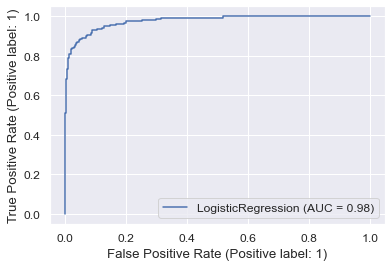

In [67]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)

In [68]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,31)),'p':[1,2]}
full_cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy')

In [69]:
full_cv_classifier.best_params_

{'n_neighbors': 7, 'p': 1}

In [71]:
knn_model=KNeighborsClassifier(n_neighbors=7,p=1)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print(knn_model.score(X_test,y_pred))
print(accuracy_score(y_test,y_pred))

#print(metrics.classification_report(y_test,y_pred))
#plot_confusion_matrix(knn_model,X_test,y_test,cmap="Blues")

1.0
0.9146666666666666
